In [1]:
from model import *

In [2]:
economy = Economy(seed=1000)

Running: assign_firms
Counter: 1000
Running: initialize_reservation
Counter: 1000
Running: initialize_money
Counter: 1000
Running: initialize_price_wage
Counter: 100


In [3]:
for agent in economy.agents:
    print(agent.money)

63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.00000000000001
63.0000000

In [4]:
# economy.step()

In [ ]:
years = 50
days = 21*12*years # 21 * 12 steps = 1 year
print(f"Running model for {days} days.")
for _ in range(days): 
    economy.step()    

Running model for 25200 days.
Today is day 1.
start of month.
Running: update_employment_hist
Counter: 1000
Running: set_wage
Counter: 100
Running: unemployed_search
Counter: 1000
Running: employed_search
Counter: 0
Running: budget
Counter: 1000
Running: reset_monthly_stats
Counter: 100
Running: buy
Counter: 1000
Running: produce
Counter: 96
Today is day 2.
Running: buy
Counter: 1000
Running: produce
Counter: 96
Today is day 3.
Running: buy
Counter: 1000
Running: produce
Counter: 96
Today is day 4.
Running: buy
Counter: 1000
Running: produce
Counter: 96
Today is day 5.
Running: buy
Counter: 1000
Running: produce
Counter: 96
Today is day 6.
Running: buy
Counter: 1000
Running: produce
Counter: 96
Today is day 7.
Running: buy
Counter: 1000
Running: produce
Counter: 96
Today is day 8.
Running: buy
Counter: 1000
Running: produce
Counter: 96
Today is day 9.
Running: buy
Counter: 1000
Running: produce
Counter: 96
Today is day 10.
Running: buy
Counter: 1000
Running: produce
Counter: 96
Today i

In [6]:
data = economy.datacollector.get_agenttype_vars_dataframe(agent_type=Household)

In [7]:
print(data)

               employment
Step  AgentID            
21    1                 1
      2                 1
      3                 1
      4                 1
      5                 1
...                   ...
25200 996               0
      997               1
      998               0
      999               0
      1000              0

[1200000 rows x 1 columns]


In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
avg_by_step = data.groupby('Step')['employment'].mean().reset_index()
max_steps = max(avg_by_step["Step"])
years = 200
steps_count = 21*12*years
avg_by_step = avg_by_step[avg_by_step['Step'] > max_steps - steps_count].reset_index()
avg_by_step['year'] = avg_by_step.index/12

In [10]:
avg_by_step

index   Step  employment       year
0         0     21       1.000   0.000000
1         1     42       1.000   0.083333
2         2     63       0.999   0.166667
3         3     84       0.999   0.250000
4         4    105       0.999   0.333333
...     ...    ...         ...        ...
1195   1195  25116       0.243  99.583333
1196   1196  25137       0.241  99.666667
1197   1197  25158       0.242  99.750000
1198   1198  25179       0.243  99.833333
1199   1199  25200       0.244  99.916667

[1200 rows x 4 columns]

In [11]:
avg_by_step['employment']

0       1.000
1       1.000
2       0.999
3       0.999
4       0.999
        ...  
1195    0.243
1196    0.241
1197    0.242
1198    0.243
1199    0.244
Name: employment, Length: 1200, dtype: float64

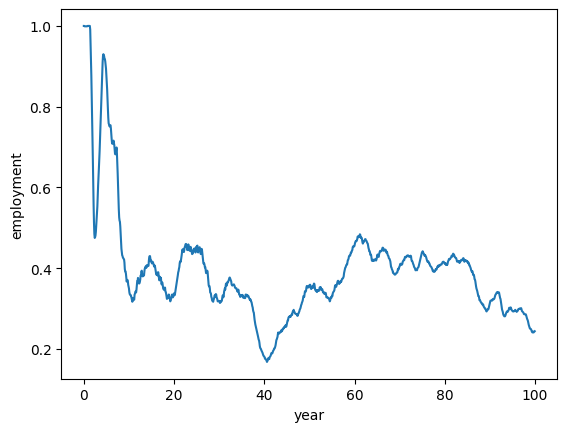

In [12]:
g = sns.lineplot(
    data=avg_by_step,
    x = 'year',
    y = 'employment'
    )

In [13]:
fdata = data = economy.datacollector.get_agenttype_vars_dataframe(agent_type=Firm)

In [14]:
fdata

output     price  employees      demand  vacancies    inventory
Step  AgentID                                                                 
21    1001        756  1.000000         12  720.000000        inf    36.000000
      1002        693  1.000000         11  660.000000        inf    33.000000
      1003        441  1.000000          7  420.000000        inf    21.000000
      1004        693  1.000000         11  657.000000        inf    36.000000
      1005          0  1.000000          0    0.000000        inf     0.000000
...               ...       ...        ...         ...        ...          ...
25200 1096          0  0.000497          0    0.911083        0.0   102.060328
      1097          0  0.000470          0    0.337490        0.0   995.201288
      1098          0  0.000474          0    1.020262        0.0   114.934257
      1099          0  0.000467          0    1.469199        0.0  7823.761983
      1100          0  0.000310          0    3.007092        0.0     7.028467

[120000 rows x 6 columns]

In [15]:
fdata_avg = fdata.groupby('Step').sum().reset_index()
fdata_avg

Step  output       price  employees        demand  vacancies  \
0        21   63000  100.000000       1000  58914.000000        inf   
1        42   63000   99.999093       1000  60364.055752        inf   
2        63   62937   99.993753        999  64382.318695        inf   
3        84   62937   99.984284        999  62924.280590        inf   
4       105   62937   99.973409        999  63094.324999        inf   
...     ...     ...         ...        ...           ...        ...   
1195  25116   15309    0.059010        243  10956.830673        0.0   
1196  25137   15183    0.058492        241  11030.000383        0.0   
1197  25158   15246    0.058082        242  21631.582669        0.0   
1198  25179   15309    0.057658        243  10763.512318        0.0   
1199  25200   15372    0.057262        244  11052.288563        0.0   

         inventory  
0     4.086000e+03  
1     6.721944e+03  
2     5.276626e+03  
3     5.289345e+03  
4     5.132020e+03  
...            ...  
1195  4.643312e+06  
1196  4.647465e+06  
1197  4.641080e+06  
1198  4.645625e+06  
1199  4.649945e+06  

[1200 rows x 7 columns]

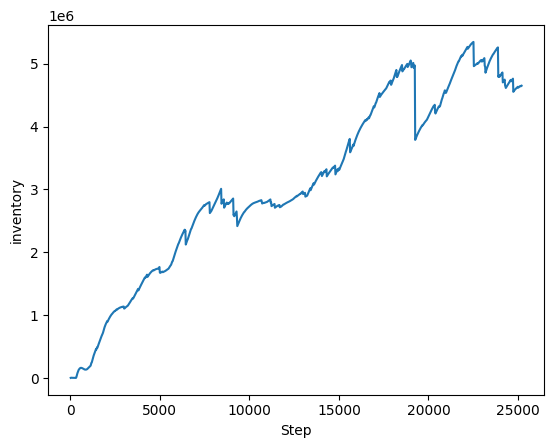

In [16]:
fdata_avg = fdata_avg[fdata_avg['Step'] > max_steps - steps_count].reset_index()
g = sns.lineplot(
    data=fdata_avg,
    x = 'Step',
    y = 'inventory'
    )

In [17]:
alldata = economy.datacollector.get_agent_vars_dataframe()
alldata

money
Step  AgentID           
21    1        36.648595
      2        39.340879
      3        36.016172
      4        61.045342
      5        50.595549
...                  ...
25200 1096      0.000453
      1097      0.000159
      1098      0.000484
      1099      0.000686
      1100      0.000933

[1320000 rows x 1 columns]

In [18]:
alldata_sum = alldata.groupby('Step').sum().reset_index()
alldata_sum

Step         money
0        21  8.311704e+04
1        42  1.034256e+05
2        63  1.239298e+05
3        84  1.446568e+05
4       105  1.656009e+05
...     ...           ...
1195  25116  4.017643e+06
1196  25137  4.017648e+06
1197  25158  4.017658e+06
1198  25179  4.017659e+06
1199  25200  4.017667e+06

[1200 rows x 2 columns]

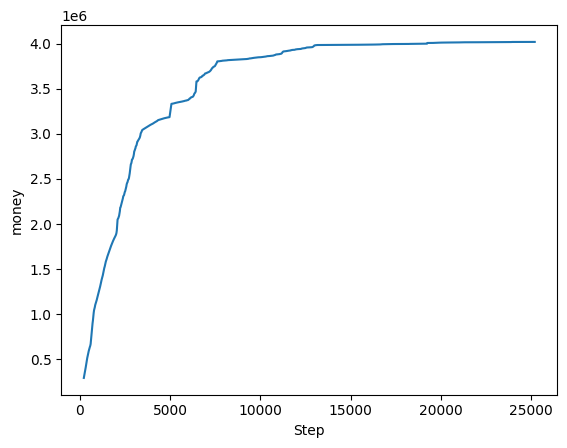

In [19]:

alldata_sum = alldata_sum[alldata_sum['Step'] > 10*21].reset_index()
g = sns.lineplot(
    data=alldata_sum,
    x = 'Step',
    y = 'money'
    )